## Manually Label Project Metaphors

Randomly select projects and extract potential metaphors. Manually label whether the presented text fragment contains a metaphorical cancer-related phrase. Focus given to the underlined keyword token.

In [1]:
import os.path as op

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import re

In [2]:
DATA_PROCESSED = '../data/processed'

UNDERLINE = '\033[4m'
END = '\033[0m'

In [3]:
df = pd.read_csv(op.join(DATA_PROCESSED, 'cancer_projects.csv'))

In [4]:
len(df)

455

In [11]:
try:
    labeled = pd.read_csv(op.join(DATA_PROCESSED, 'labeled_projects.csv'))
except (pd.errors.EmptyDataError, FileNotFoundError):
    labeled = pd.DataFrame([], columns=['project_id', 'fragment', 'char_location', 'type', 'keyword'])
    labeled.to_csv(op.join(DATA_PROCESSED, 'labeled_projects.csv'))

In [27]:
BATTLE_WORDS = ['fight', 'fights', 'fighting', 'fought', 'battle', 'battles', 'battled', 'battling', 
        'war', 'beat', 'beating', 'beats', 'brutal']

JOURNEY_WORDS = ['path', 'journey', 'destination']

results = []

window = 80

c = input('Num: ')

try:
    c = int(c)
except Exception:
    print('Format error')
    
proj_sample = df.sample(c)

for project in proj_sample.itertuples():
    
    print()
    print(f'PROJECT {project.name}')
    
    metaphor = False
    
    for battle_word in BATTLE_WORDS:
        
        exp = r'(' + battle_word + ')\W'

        for kw_match in re.finditer(exp, project.text):
            start, end = max(0, kw_match.start() - window), min(len(project.text), kw_match.end() + window)

            print(project.text[start:kw_match.start()] + 
                  UNDERLINE + 
                  project.text[kw_match.start():kw_match.end()-1] + 
                  END + 
                  project.text[kw_match.end()-1:end])
            
            res = input('Is this a cancer battle metaphor? ')
            
            if res.lower() == 'y':
                results.append([project.id, project.text[start:end], kw_match.start(), 'battle', battle_word])
                metaphor = True
                                
    for journey_word in JOURNEY_WORDS:
        
        exp = r'(' + journey_word + ')\W'

        for kw_match in re.finditer(exp, project.text):
            start, end = max(0, kw_match.start() - window), min(len(project.text), kw_match.end() + window)

            print(project.text[start:kw_match.start()] + 
                  UNDERLINE + 
                  project.text[kw_match.start():kw_match.end()-1] + 
                  END + 
                  project.text[kw_match.end()-1:end])
            
            res = input('Is this a cancer journey metaphor? ')
            
            if res.lower() == 'y':
                results.append([project.id, project.text[start:end], kw_match.start(), 'journey', journey_word])
                metaphor = True
                
    if not metaphor:
        results.append([project.id, '', np.nan, 'none', ''])
        print('No metaphors found')
                            
results = pd.DataFrame(results, columns=['project_id', 'fragment', 'char_location', 'type', 'keyword'])

labeled = pd.concat([labeled, results], axis=0, ignore_index=True).drop_duplicates(subset=['project_id', 'char_location'])

labeled.to_csv(op.join(DATA_PROCESSED, 'labeled_projects.csv'), index=False)

print()
print(f'Saved {len(results)} for a total of {len(labeled)}!')

del results, proj_sample

Num: 10

PROJECT Mom, Cancer, and Dirt Bikes... (Canceled)
  I was far away in the US Air Force and supported my mom over the phone as she fought, and won, her breast cancer battle.  Her treatment had been very successful (rad
Is this a cancer battle metaphor? y
ed hormone manipulation to stop the growth.  Over the last 8 years now, she has fought a very good battle, but in truth, the cancer is slowly winning.  This year, in p
Is this a cancer battle metaphor? y
e and supported my mom over the phone as she fought, and won, her breast cancer battle.  Her treatment had been very successful (radiation) and after all the work was 
Is this a cancer battle metaphor? y
tion to stop the growth.  Over the last 8 years now, she has fought a very good battle, but in truth, the cancer is slowly winning.  This year, in preparation for a ne
Is this a cancer battle metaphor? y

PROJECT ÉSTAINE | Science Fashion Impact | Shop Smart. Fight Cancer.
king out our project! We are passionate about using hig

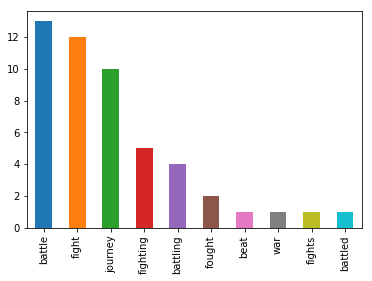

In [28]:
labeled.loc[labeled['type'] != 'none', 'keyword'].value_counts().plot(kind='bar')